In [1]:
# Import librarie

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load the series

series = pd.read_csv('monthly champagne sales.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [4]:
# seperate out a validation dataset

split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)

Dataset 93, Validation 12


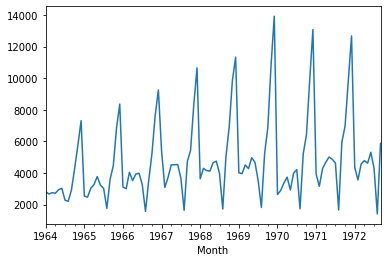

In [3]:
series.plot()
plt.show()